In [1]:
import pandas as pd
import numpy as np

import prepare as p
from sklearn.model_selection import train_test_split
# git check out
# age, avg income, people who cause damage, 
# age has outlier

# to pull: git pull origin main
# to go to branch: git checkout dev_branch


import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

In [2]:
df = pd.read_csv('cws_residents.csv')

In [3]:
df = p.prep(df)

In [4]:
charge_codes = [96, 105, 106, 115, 127, 131, 137, 138,142, 148, 154,
                155, 156, 163, 166, 169, 183, 189, 192, 229, 231, 233,
                245, 246, 247, 248, 249,250, 251, 253, 268, 298]

In [5]:
df.head()

id  total_charges  amount_paid  open  charge_code  \
0  3946        1311.00      1311.00     0           74   
1  3946        1311.00      1311.00     0           74   
2  3946           1.83         1.83     0          191   
3  3946          27.00        27.00     0          128   
4  3946          21.93        21.93     0          112   

                                         description  property_id  \
0                                     Rent (06/2022)          136   
1                                     Rent (08/2022)          136   
2                      Amenity fee (11/2021) 11 days          136   
3                        Trash service fee (07/2022)          136   
4  Water Charge 01/03/2023 to 02/14/2023 :Final U...          136   

             charge_name   status  rent  term  monthly_income  \
0                   Rent  Current  1311    15           52500   
1                   Rent  Current  1311    15           52500   
2            Amenity fee  Current  1311    15           52500   
3      Trash service fee  Current  1311    15           52500   
4  Utility-water charges  Current  1311    15           52500   

   guarrantor_required  total_income recommendation  age  risk_score  \
0                False        666000         Accept   33         745   
1                False        666000         Accept   33         745   
2                False        666000         Accept   33         745   
3                False        666000         Accept   33         745   
4                False        666000         Accept   33         745   

                                     reason  
0  Insufficient period of Residence History  
1  Insufficient period of Residence History  
2  Insufficient period of Residence History  
3  Insufficient period of Residence History  
4  Insufficient period of Residence History

In [6]:
df['bad_resident'] = df['charge_code'].isin(charge_codes)
df['bad_resident'] = np.where(df.bad_resident == True, 1, 0)

In [7]:
df.head()

id  total_charges  amount_paid  open  charge_code  \
0  3946        1311.00      1311.00     0           74   
1  3946        1311.00      1311.00     0           74   
2  3946           1.83         1.83     0          191   
3  3946          27.00        27.00     0          128   
4  3946          21.93        21.93     0          112   

                                         description  property_id  \
0                                     Rent (06/2022)          136   
1                                     Rent (08/2022)          136   
2                      Amenity fee (11/2021) 11 days          136   
3                        Trash service fee (07/2022)          136   
4  Water Charge 01/03/2023 to 02/14/2023 :Final U...          136   

             charge_name   status  rent  term  monthly_income  \
0                   Rent  Current  1311    15           52500   
1                   Rent  Current  1311    15           52500   
2            Amenity fee  Current  1311    15           52500   
3      Trash service fee  Current  1311    15           52500   
4  Utility-water charges  Current  1311    15           52500   

   guarrantor_required  total_income recommendation  age  risk_score  \
0                False        666000         Accept   33         745   
1                False        666000         Accept   33         745   
2                False        666000         Accept   33         745   
3                False        666000         Accept   33         745   
4                False        666000         Accept   33         745   

                                     reason  bad_resident  
0  Insufficient period of Residence History             0  
1  Insufficient period of Residence History             0  
2  Insufficient period of Residence History             0  
3  Insufficient period of Residence History             0  
4  Insufficient period of Residence History             0

In [8]:
df.shape

(231220, 19)

In [9]:
df.id.nunique()

5004

In [10]:
df.columns

Index(['id', 'total_charges', 'amount_paid', 'open', 'charge_code',
       'description', 'property_id', 'charge_name', 'status', 'rent', 'term',
       'monthly_income', 'guarrantor_required', 'total_income',
       'recommendation', 'age', 'risk_score', 'reason', 'bad_resident'],
      dtype='object')

In [11]:
df.term.nunique()

20

In [12]:
df.term.unique()

array([15, 12, 18, 13,  8,  4, 16, 14, 17,  5, 11,  6,  3, 10,  7,  9,  2,
       25,  1, 28])

In [13]:
# df.isnull().sum()

In [14]:
df.drop(columns=['total_charges', 'amount_paid', 'open', 'charge_code','description', 'charge_name', ], inplace=True)

In [15]:
df = df.drop_duplicates(subset = ['id', 'bad_resident'])

In [16]:
df_bad = df[df['bad_resident'] == 1]

# Get the indices of users who only have 0 status
idx_0 = df[~df['id'].isin(df_bad['id'])].index

# Filter rows based on 0 status for users who only have 0 status
df_0 = df.loc[idx_0]

# Combine the 1 and 0 dataframes
df_combined = pd.concat([df_bad, df_0])

# Sort by id to get the final result
df = df_combined.sort_values('id')
df = df.reset_index(drop=True)

In [17]:
df.head()

id  property_id   status  rent  term  monthly_income  \
0  3946          136  Current  1311    15           52500   
1  3962          136  Current  1661    12           65000   
2  4050          136  Current  1412    12           48000   
3  4948          140  Current  1377    18           72000   
4  5001          140  Current  2199    13               0   

   guarrantor_required  total_income                          recommendation  \
0                False        666000                                  Accept   
1                False        889992  Accept with Conditions (Extra Deposit)   
2                False        576000  Accept with Conditions (Extra Deposit)   
3                False             0   A-Criminal History Meets Requirements   
4                 True         54996      Accept with Conditions (Guarantor)   

   age  risk_score                                    reason  bad_resident  
0   33         745  Insufficient period of Residence History             1  
1   27         758                      No Credit Experience             0  
2   33         666  Insufficient period of Residence History             1  
3   39           0           Meets All Property Requirements             0  
4   23         752                                       NaN             0

In [18]:
df.shape

(5004, 13)

In [19]:
pd.set_option('display.max_rows', None)

In [20]:
def train_vailidate_test_split(df, target, strat = None):
    
    '''splits the data inserted into a train test validate split
    if you are going to stratify you must give a third argument
    if you are not going to stratify only use two arguments'''
    
    if strat:
        train_validate, test = train_test_split(df, train_size =.8, random_state = 91, stratify = df[target])
        train, validate = train_test_split(train_validate, train_size = .7, random_state = 91, stratify = train_validate[target])
    else:
        train_validate, test = train_test_split(df, train_size =.8, random_state = 91)
        train, validate = train_test_split(train_validate, train_size = .7, random_state = 91)
        
    X_train = train.drop(columns=target)
    y_train = train[target]
    X_val = validate.drop(columns=target)
    y_val = validate[target]
    X_test = test.drop(columns=target)
    y_test = test[target]
    
    return train, validate, test, X_train, y_train, X_val, y_val, X_test, y_test

In [21]:
train, validate, test, X_train, y_train, X_val, y_val, X_test, y_test = train_vailidate_test_split(df, 'bad_resident', strat = True)

In [22]:
train.shape, validate.shape, test.shape

((2802, 13), (1201, 13), (1001, 13))

In [23]:
train.head()

id  property_id   status  rent  term  monthly_income  \
2505  63279           76  Current  1679     4           14083   
1262  45474          127  Current  1479    18            4095   
2542  63383           93  Current  1269    12            3308   
730   31765          136  Current  1689    12            1906   
3048  64923          121  Current  1409    18            6250   

      guarrantor_required  total_income  \
2505                False        241992   
1262                 True         49140   
2542                 True             0   
730                  True             0   
3048                False         96732   

                              recommendation  age  risk_score  \
2505                                  Accept   45         648   
1262      Accept with Conditions (Guarantor)   34         561   
2542      Accept with Conditions (Guarantor)   40         632   
730       Accept with Conditions (Guarantor)   27         771   
3048  Accept with Conditions (Extra Deposit)   33           0   

                                   reason  bad_resident  
2505      Meets All Property Requirements             0  
1262          Severe level of Charge-offs             0  
2542  Insufficient Income to Support Rent             0  
730   Insufficient Income to Support Rent             0  
3048                 No Credit Experience             0

In [24]:
train.guarrantor_required.value_counts()

False    2437
True      365
Name: guarrantor_required, dtype: int64

In [25]:
train.bad_resident.value_counts()

0    2695
1     107
Name: bad_resident, dtype: int64

In [26]:
def vis_countplot(col, train):
    ''' takes in a column name and a dataframe and show countplot graph'''
    
    #plot countplot graph
    sns.countplot(x=col, hue='bad_resident', data=train)
    plt.title(col + ' relationship with resident')
    plt.show()

In [27]:
def chi_test(col, train):
    '''takes in a list and a dataframe and runs chi-square test to compare relationship of churn 
    with a datframe attributes 
    '''
    
    # set alpha value to 0.05
    alpha = 0.05
    
    # set null and alternative hypothesis 
    null_hypothesis = col + ' and bad_resident are independent'
    alternative_hypothesis = col + ' and bad_resident are dependent'

    # create an observed crosstab, or contingency table from a dataframe's two columns
    observed = pd.crosstab(train[col], train.bad_resident)

    # run chi-square test
    chi2, p, degf, expected = stats.chi2_contingency(observed)

    # print Null Hypothesis followed by a new line
    print(f'Null Hypothesis: {null_hypothesis}\n')

    # print Alternative Hypothesis followed by a new line
    print(f'Alternative Hypothesis: {alternative_hypothesis}\n')

    # print the chi2 value
    print(f'chi^2 = {chi2}') 

    # print the p-value followed by a new line
    print(f'p     = {p}\n')

    if p < alpha:
        print(f'We reject null hypothesis')
        print(f'There exists some relationship between {col} and bad_resident.')
    else:
        print(f'We fail to reject null hypothesis')
        print(f'There appears to be no significant relationship between {col} and bad_resident.')

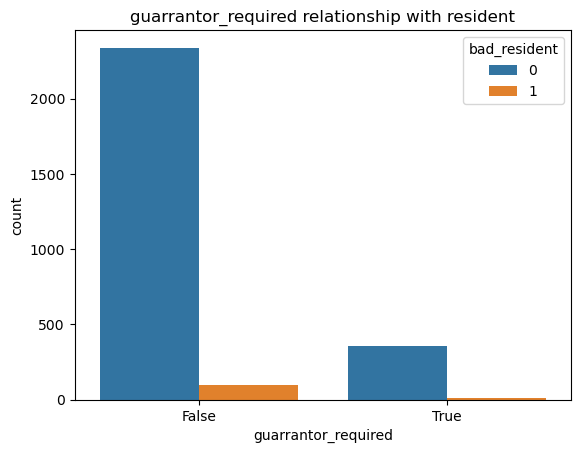

In [28]:
vis_countplot('guarrantor_required', train)

In [29]:
chi_test('guarrantor_required', train)

Null Hypothesis: guarrantor_required and bad_resident are independent

Alternative Hypothesis: guarrantor_required and bad_resident are dependent

chi^2 = 1.6894238341055405
p     = 0.19367693792522955

We fail to reject null hypothesis
There appears to be no significant relationship between guarrantor_required and bad_resident.


In [30]:
df.rent.nunique()

663

In [31]:
df.rent.mean()

1672.371103117506

In [32]:
rent_avg = round(df.rent.mean())
rent_avg 

1672

In [33]:
df.bad_resident.value_counts()

0    4813
1     191
Name: bad_resident, dtype: int64

In [34]:
df.sort_values('rent')

id  property_id   status  rent  term  monthly_income  \
2582  63492           70  Current     0    12            6000   
2417  62685           85  Current     0     6           12916   
1709  59984          138  Current     0     7            5000   
1334  45817           66  Current     0    13            5500   
1641  47151           88  Current   100     6          100000   
3605  66810           94  Current   829    15            2300   
3799  67475           94  Current   879    13            3040   
3077  65025           94  Current   879    14            1700   
1298  45605           94  Current   889    15            3281   
3798  67469           94  Current   889    13            3000   
3063  64969           94  Current   899    13            3300   
2702  63840           94  Current   899    15            4800   
4204  69321           93  Current   899    13            1700   
1736  60074           93  Current   899    12            4000   
1751  60127           93  Current   909    13            3500   
3767  67355           94  Current   909    15            2800   
4226  69390           93  Current   909    12            1200   
801   32053           94  Current   909    12            1589   
1796  60340           93  Current   909    12            2500   
864   32270           94  Current   919    13            3800   
4667  71857          115  Current   919    12            3639   
3200  65546           94  Current   929    12               0   
4514  71041          115  Current   929    12            3400   
4926  73286          115  Current   939    15            2834   
3427  66264           94  Current   959    15            1000   
3536  66552          114  Current   959    12            4000   
2388  62598           94  Current   969    12            2800   
3050  64928           93  Current   969    12            2754   
3383  66148           94  Current   969    12            1180   
4246  69488           93  Current   979    12            1000   
839   32174           93  Current   979     6            7750   
3533  66547           94  Current   979    15            5000   
3429  66269           94  Current   979    12            3833   
2958  64663           94  Current   979    15            1547   
2359  62505           94  Current   989    15            3000   
2660  63728          115  Current   989    12               0   
4047  68763          104  Current   989    14            7750   
1318  45762           93  Current   989    12             650   
3011  64799          115  Current   989    12            2300   
2779  64055          115  Current   989    12            5000   
4392  70565           93  Current   999    12            3750   
2968  64678           93  Current   999    12            3200   
4390  70552           93  Current   999    12            3600   
938   32568           93  Current   999    12            2800   
1047  33526           93  Current  1009    12            3734   
3874  67992          114  Current  1009    12            3600   
3480  66405           89  Current  1019    12            4600   
2998  64753           97  Current  1029    12            4000   
429   21357           93  Current  1029    13            5000   
3468  66380          115  Current  1029    12            3000   
1285  45575           68  Current  1031    12            3666   
1479  46429           68  Current  1031    12            2576   
2923  64576          111  Current  1039    15            5000   
3479  66402           94  Current  1039    15            3400   
1619  46903           93  Current  1039    13             650   
4215  69344          104  Current  1039    12            3800   
3388  66159           93  Current  1039    13            3200   
3870  67985          104  Current  1039    12            9300   
1211  45278           93  Current  1039    14             800   
1748  60120          113  Current  1039    13            5480   
3014  64809          111  Current  1039    1

In [35]:
rent_avg = round(df.rent.mean())
df.loc[df["rent"] == 0, 'rent'] = rent_avg 
df.loc[df["rent"] == 100, 'rent'] = rent_avg 

In [44]:
df.sort_values('rent')

id  property_id   status  rent  term  monthly_income  \
3605  66810           94  Current   829    15            2300   
3799  67475           94  Current   879    13            3040   
3077  65025           94  Current   879    14            1700   
1298  45605           94  Current   889    15            3281   
3798  67469           94  Current   889    13            3000   
1736  60074           93  Current   899    12            4000   
4204  69321           93  Current   899    13            1700   
3063  64969           94  Current   899    13            3300   
2702  63840           94  Current   899    15            4800   
1751  60127           93  Current   909    13            3500   
4226  69390           93  Current   909    12            1200   
3767  67355           94  Current   909    15            2800   
801   32053           94  Current   909    12            1589   
1796  60340           93  Current   909    12            2500   
864   32270           94  Current   919    13            3800   
4667  71857          115  Current   919    12            3639   
4514  71041          115  Current   929    12            3400   
3200  65546           94  Current   929    12               0   
4926  73286          115  Current   939    15            2834   
3536  66552          114  Current   959    12            4000   
3427  66264           94  Current   959    15            1000   
3383  66148           94  Current   969    12            1180   
3050  64928           93  Current   969    12            2754   
2388  62598           94  Current   969    12            2800   
4246  69488           93  Current   979    12            1000   
3533  66547           94  Current   979    15            5000   
3429  66269           94  Current   979    12            3833   
839   32174           93  Current   979     6            7750   
2958  64663           94  Current   979    15            1547   
4047  68763          104  Current   989    14            7750   
1318  45762           93  Current   989    12             650   
2359  62505           94  Current   989    15            3000   
2779  64055          115  Current   989    12            5000   
2660  63728          115  Current   989    12               0   
3011  64799          115  Current   989    12            2300   
938   32568           93  Current   999    12            2800   
4392  70565           93  Current   999    12            3750   
2968  64678           93  Current   999    12            3200   
4390  70552           93  Current   999    12            3600   
1047  33526           93  Current  1009    12            3734   
3874  67992          114  Current  1009    12            3600   
3480  66405           89  Current  1019    12            4600   
3468  66380          115  Current  1029    12            3000   
429   21357           93  Current  1029    13            5000   
2998  64753           97  Current  1029    12            4000   
1479  46429           68  Current  1031    12            2576   
1285  45575           68  Current  1031    12            3666   
3388  66159           93  Current  1039    13            3200   
3870  67985          104  Current  1039    12            9300   
3014  64809          111  Current  1039    14            2800   
2923  64576          111  Current  1039    15            5000   
1619  46903           93  Current  1039    13             650   
3479  66402           94  Current  1039    15            3400   
1748  60120          113  Current  1039    13            5480   
4210  69331           94  Current  1039    14            3000   
1211  45278           93  Current  1039    14             800   
1454  46311           93  Current  1039    14            3430   
4215  69344          104  Current  1039    12            3800   
1176  45149           66  Current  1041    12            3125   
4775  72470           66  Current  1041    12            3207   
925   32528           66  Current  1041    1

In [36]:
df.rent.min()

829

In [37]:
df.rent.max()

5574

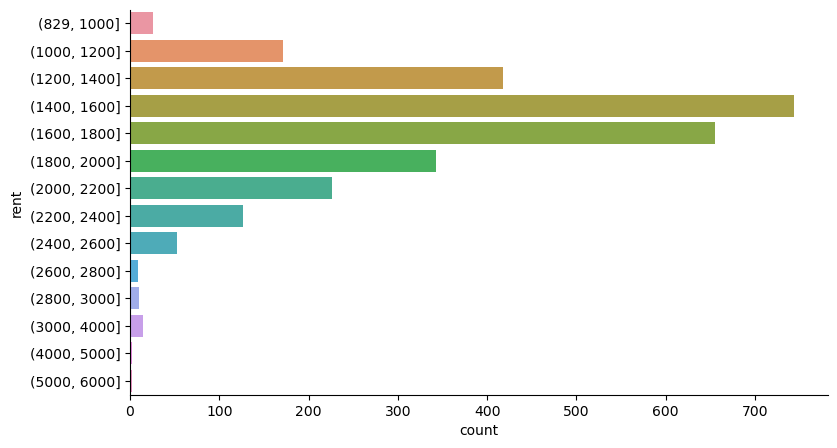

In [38]:
bins = [829,1000,1200,1400,1600,1800,2000,2200,2400,2600,2800,3000,4000,5000,6000]
rent_bin = pd.cut(train['rent'], bins = bins)
plt.figure(figsize=(9, 5))
sns.countplot(y=rent_bin,data=train)
sns.despine()
plt.show()

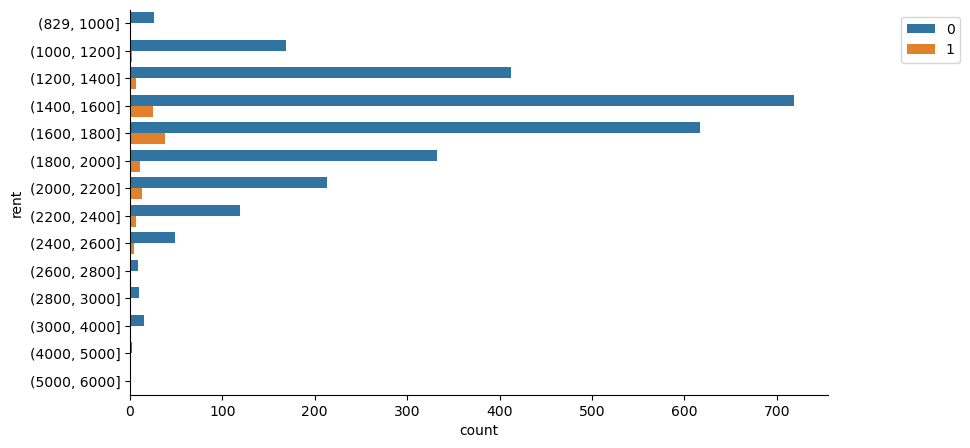

In [39]:
bins = [829,1000,1200,1400,1600,1800,2000,2200,2400,2600,2800,3000,4000,5000,6000]
rent_bin = pd.cut(train['rent'], bins = bins)
plt.figure(figsize=(9, 5))
sns.countplot(y=rent_bin,hue='bad_resident',data=train)
sns.despine()
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1));
plt.show()

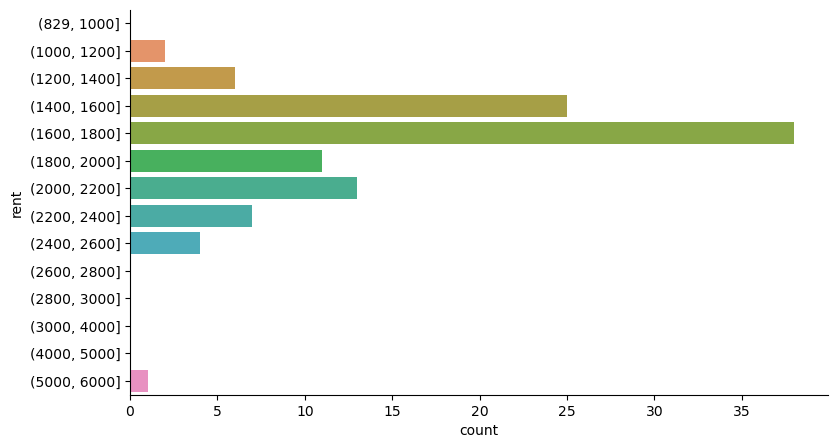

In [40]:
train_bad_resident = train[train['bad_resident']==1]
bins = [829,1000,1200,1400,1600,1800,2000,2200,2400,2600,2800,3000,4000,5000,6000]
rent_bin = pd.cut(train_bad_resident['rent'], bins = bins)
plt.figure(figsize=(9, 5))
sns.countplot(y=rent_bin,data=train_bad_resident)
sns.despine()
plt.show()

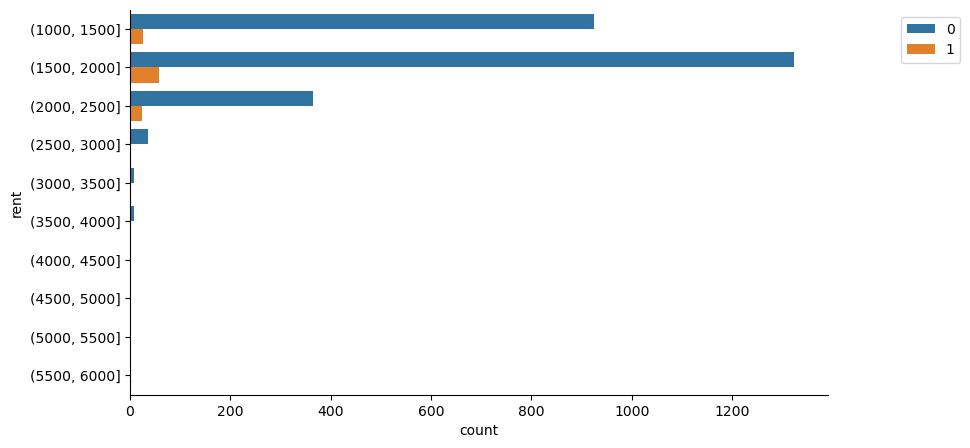

In [41]:
bins = [1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000]
rent_bin = pd.cut(train['rent'], bins = bins)
plt.figure(figsize=(9, 5))
sns.countplot(y=rent_bin,hue='bad_resident',data=train)
sns.despine()
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1));
plt.show()

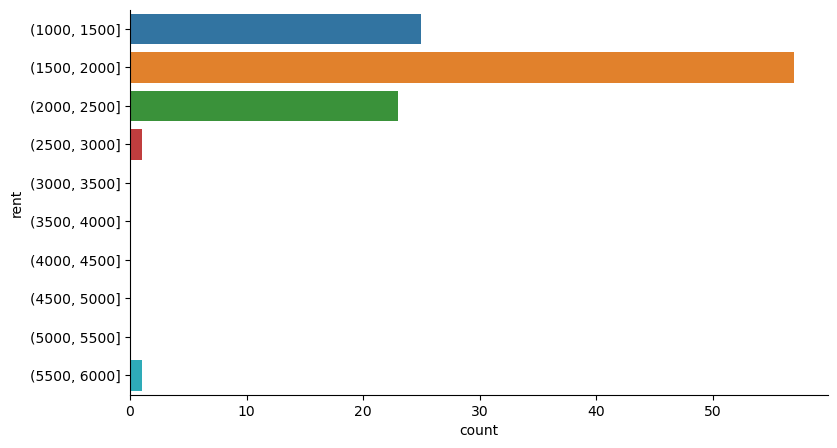

In [42]:
train_bad_resident = train[train['bad_resident']==1]
bins = [1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000]
rent_bin = pd.cut(train_bad_resident['rent'], bins = bins)
plt.figure(figsize=(9, 5))
sns.countplot(y=rent_bin,data=train_bad_resident)
sns.despine()
plt.show()

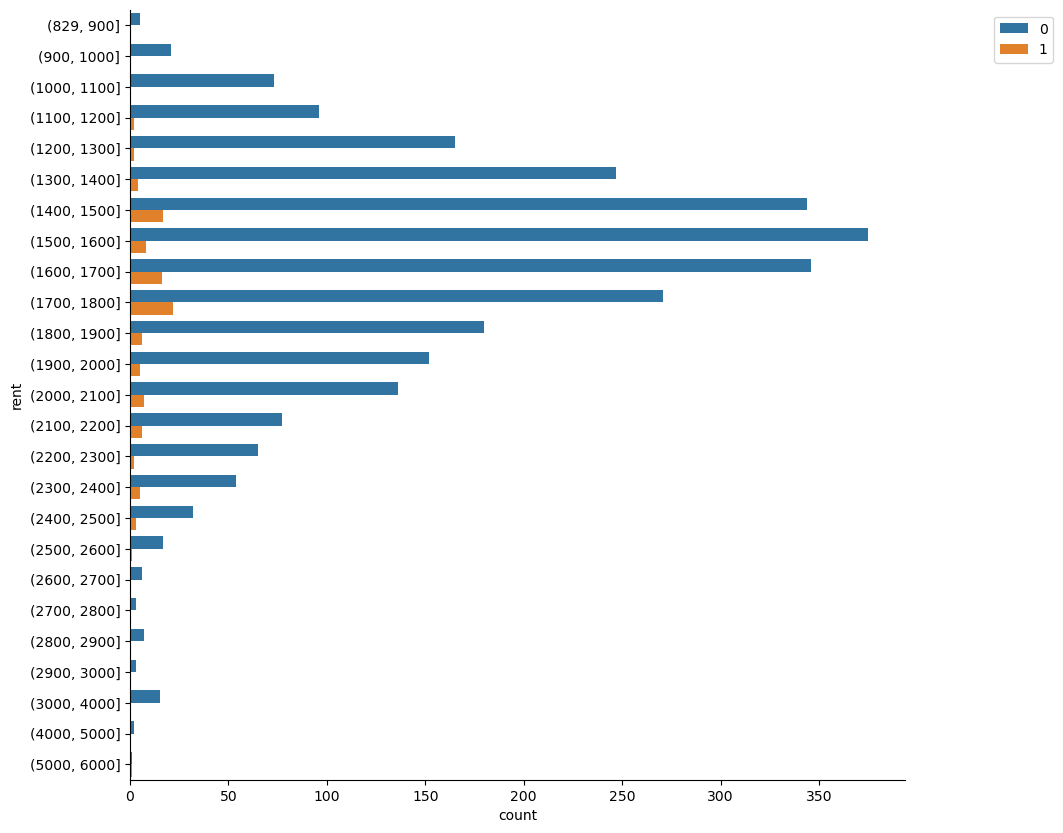

In [47]:
bins = [829,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300,2400,2500,2600,2700,2800,2900,3000,4000,5000,6000]
rent_bin = pd.cut(train['rent'], bins = bins)
plt.figure(figsize=(10, 10))
sns.countplot(y=rent_bin,hue='bad_resident',data=train)
sns.despine()
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1));
plt.show()

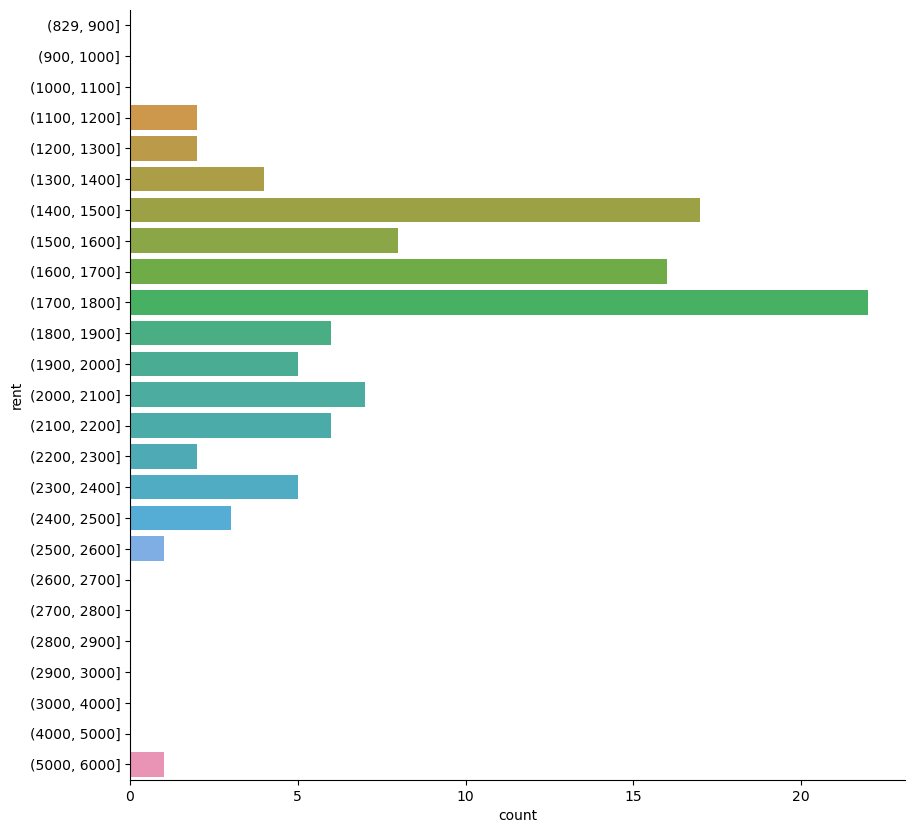

In [50]:
train_bad_resident = train[train['bad_resident']==1]
bins = [829,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300,2400,2500,2600,2700,2800,2900,3000,4000,5000,6000]
rent_bin = pd.cut(train_bad_resident['rent'], bins = bins)
plt.figure(figsize=(10, 10))
sns.countplot(y=rent_bin,data=train_bad_resident)
sns.despine()
plt.show()

In [51]:
df.rent.median()

1619.0